In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import itertools
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
import sys

Using TensorFlow backend.


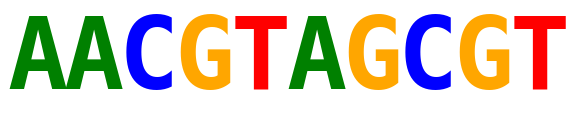

In [7]:
seq = "AACGTAGCGT"
#seq = input()
seq = seq.upper() # returns the uppercased string from the given seq
pool = ['A', 'C', 'G', 'T']
color_scheme = {
    'A': [0, 0.5, 0], # Green
    'C': [0, 0, 1], # Blue
    'G': [1, 0.65, 0], # Yellow
    'T': [1, 0, 0] # Red
}
# checking whether there is any non-nucleotide
for test in seq:
    if not test in pool:
        sys.exit("please enter sequences only with A,C,G,T")
length = len(seq) # returns the length of input       

xshift = 0
fig, ax = plt.subplots(1, 1, figsize = [length,1.5])
ax.set_xticks(range(0,length+1))
for base in seq:
    txt = ax.text(x = xshift,
                  y = 0,
                  s = base,
                  color = color_scheme[base],
                  family = 'monospace',
                  size = 100,
                  weight = 'bold'
                  
                 
                 )
    xshift = xshift+1
plt.xlim(0, length)   
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.savefig('image/'+seq+'.png',
           dpi = 300,
           bbox_inches = 'tight',
           pad_inches = 0)

seq_num = np.array([sequence for sequence in seq])
seq_num = np.char.replace(seq_num, 'A', '0')
seq_num = np.char.replace(seq_num, 'C', '1')
seq_num = np.char.replace(seq_num, 'G', '2')
seq_num = np.char.replace(seq_num, 'T', '3')
seq_num = seq_num.astype(np.int)
seq_num =np.reshape(seq_num, (-1, 1))

In [12]:
def k_mer_motif(seq_mat,
                num_k,
                num_n = 10,
                save_or_not = True):
    # seq_mat should be a numpy matrix (batch, num_n) with 0,1,2,3 value
    # A:0 / C:1 / G:2 / T:3
    # num_n represents the length of each sequence: AGCCG -> 5
    # num_k represents the number of nucleotides in one motif: 2 -> AA/AC/AG/AT/CA ....
    # save_or_not is a switch for saving option
    
    # Create a list of motif pool. The size of pool will be 4^num_k.
    iter_pool = itertools.product('0123', repeat = num_k)
    pool = []
    for i in iter_pool:
        pool.append([int(i[j]) for j in range(num_k)])
    # Group consecutive k elements in the original dataset. [1,0,2,3,2] -> [[1,0], [0,2], [2, 3], [3, 2]]
    seq_group = []
    for i in range(seq_mat.shape[0]):
        temp = []
        for k in range(num_n-num_k+1):
            temp.append([seq_mat[i][k+j] for j in range(num_k)])
        seq_group.append(temp)
        
    # Create a blank transformed array.
    output = np.zeros((seq_mat.shape[0], num_n-num_k+1),dtype = int)

    for batch in range(seq_mat.shape[0]):
        for val in range(len(pool)):
            try:
                pos = [i for i, n in enumerate(seq_group[batch]) if n == pool[val]]
                output[batch][pos] = val

            except:
                pass
    return output

def matrix_plot(input_mat, num_k, save_or_not = True):
    input_mat = k_mer_motif(np.reshape(input_mat, (1, 10)),num_k)[0].reshape((-1, 1))
    fig, ax = plt.subplots(1, 1, figsize = [input_mat.shape[0], 4**num_k*1.2])
    im = ax.imshow(to_categorical(input_mat, num_classes = 4**num_k).T, cmap = 'binary')
    ax.set_xticks(np.arange(input_mat.shape[0]))
    ax.set_yticks(np.arange(4**num_k))
    iter_pool = itertools.product('ACGT', repeat = num_k)
    ylabel =[]
    for i in iter_pool:
        temp =''
        for j in range(num_k):
            temp += i[j]
        ylabel.append(temp)
    ax.set_yticklabels(ylabel,
                      family = 'monospace',
                      size = 30,
                      weight = 'bold')
    ax.set_xticklabels(range(1,input_mat.shape[0]+1),
                      family = 'monospace',
                      size = 30,
                      weight = 'bold')
    ax.tick_params(top = True, bottom = False,
                  labeltop = True, labelbottom = False)
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
        
    ax.set_xticks(np.arange(input_mat.shape[0]+1)-.5, minor = True)
    ax.set_yticks(np.arange(4**num_k+1)-.5, minor = True)
    ax.tick_params(which = 'minor', bottom = False, left = False)
    ax.tick_params(direction = 'out', length = 6, width = 2)
    ax.grid(which = 'minor', color = 'black', linewidth = 2)
    norm = Normalize(vmin = 0, vmax = 4**num_k)
    for idx, base in enumerate(input_mat):
        txt = im.axes.text(idx,
                          base,
                          s = ylabel[int(base)],
                          c = cm.cool(norm(int(input_mat[idx]))),
                          family = 'monospace',
                          size = 50 if num_k ==1 else 80//num_k,
                          weight = 'bold',
                          ha = 'center',
                          va = 'center')
    if save_or_not:
        plt.savefig('image/'+seq+'_'+str(num_k)+'mer_motif.png',
           dpi = 300,
           bbox_inches = 'tight',
           pad_inches = 0)
        plt.close()

In [13]:
matrix_plot(seq_num,1)
matrix_plot(seq_num,2)
matrix_plot(seq_num,3)

ValueError: Image size of 2100x92160 pixels is too large. It must be less than 2^16 in each direction.

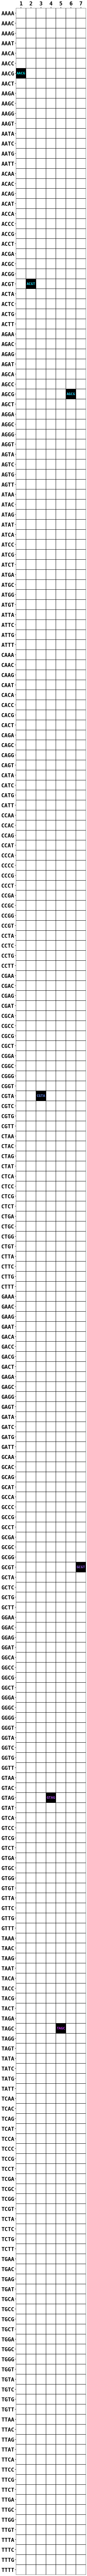

In [14]:
matrix_plot(seq_num,4)